In [1]:
from IntrinsicDisorder.intermediate import Intermediate
from IsoformAnalysis.FastaToDF import FastaToDF
from IsoformAnalysis.IsoformAnalyzer import IsoformAnalyzer

In [2]:
interaction_data = Intermediate(
    input=[
        "Data/BioPlex_293T_Network_10K_Dec_2019.tsv",
        "Data/BioPlex_HCT116_Network_5.5K_Dec_2019.tsv",
        "Data/Huttlin_BioPlex3_Table_S1.xlsb",
        "Data/uniprotkb_AND_reviewed_true_AND_model_o_2024_02_28.fasta",
    ]
)

In [3]:
iso_lib = FastaToDF("Data/UP000005640_9606_additional.fasta").fasta

In [4]:
data_293T = interaction_data.unique_293T
isoforms_293T = IsoformAnalyzer(data_293T, iso_lib)

c:\Users\Jack\Kod\Kex-klon\Exploring-cell-interactome\IsoformAnalysis\IsoformAnalyzer.py:156: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'A0AUZ9-2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['canonical_protein'] == data_column_1, f'isoform_{i}'] = data_column_2_value
c:\Users\Jack\Kod\Kex-klon\Exploring-cell-interactome\IsoformAnalysis\IsoformAnalyzer.py:156: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Q16637-2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['canonical_protein'] == data_column_1, f'isoform_{i}'] = data_column_2_value
c:\Users\Jack\Kod\Kex-klon\Exploring-cell-interactome\IsoformAnalysis\IsoformAnalyzer.py:156: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a

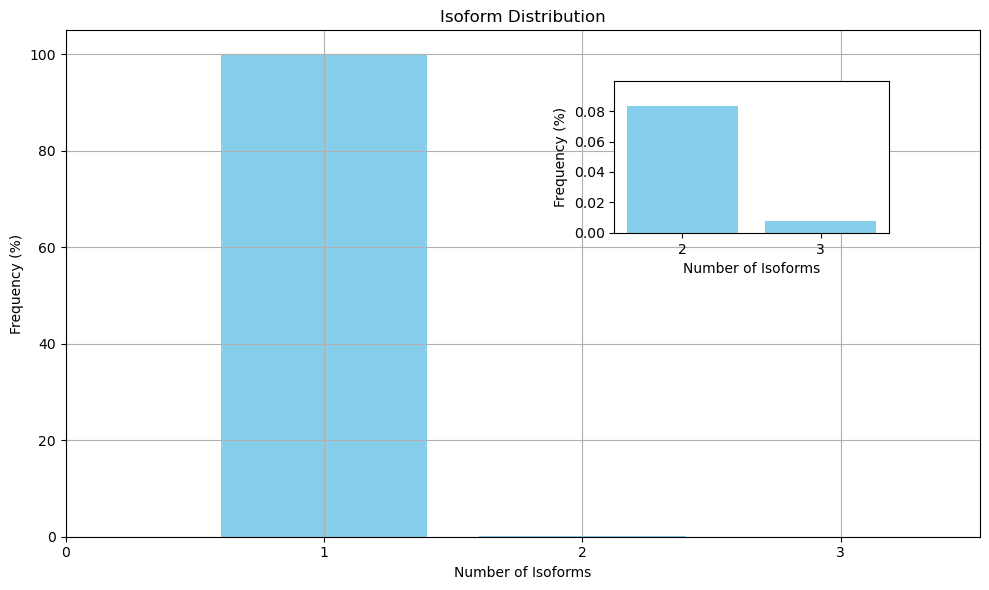

In [5]:
isoforms_293T.isoform_distribution()